In [108]:
pip install mglearn


Note: you may need to restart the kernel to use updated packages.


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn as mg

In [110]:
X,y=mg.datasets.make_forge()


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


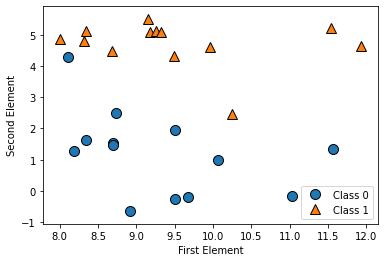

In [111]:
mg.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First Element")
plt.ylabel("Second Element")
print('X.shape: {}'.format(X.shape))


(-5.0, 5.0)

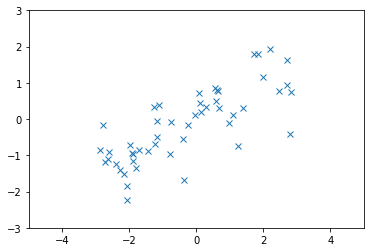

In [112]:
X,y=mg.datasets.make_wave(n_samples=50)
plt.plot(X,y,'x')
plt.ylim(-3,3)
plt.xlim(-5,5)

In [113]:
import sklearn as sk

In [114]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print('cancer.keys():\n{}'.format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [115]:
cancer.data.shape

(569, 30)

In [116]:
print('Sample counts per class:\n{}'.format(
    {n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [117]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [118]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [119]:
from sklearn.datasets import load_boston
boston=load_boston()


In [120]:
boston.data.shape

(506, 13)

In [121]:
X,y=mg.datasets.load_extended_boston()
X.shape

(506, 104)

In [122]:
from sklearn.model_selection import train_test_split
X,y=mg.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [123]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [124]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [125]:
clf.score(X_test,y_test)

0.8571428571428571

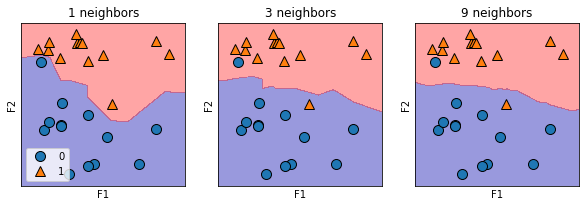

In [126]:
fig,axes=plt.subplots(1,3, figsize=(10,3))
for n_neighbours, ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbours).fit(X,y)
    mg.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mg.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} neighbors'.format(n_neighbours))
    ax.set_xlabel("F1")
    ax.set_ylabel('F2')
axes[0].legend(loc=3)
    

In [127]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=66)

In [128]:
training_accuracy=[]
test_accuracy=[]
#try neighbours from 1 to 10
neighbors_settings=range(1,11)
for n_neighbours in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbours)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    

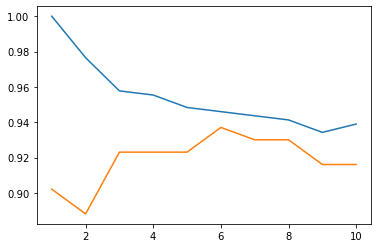

In [129]:
plt.plot(neighbors_settings,training_accuracy)
plt.plot(neighbors_settings,test_accuracy)

In [130]:
from sklearn.neighbors import KNeighborsRegressor
X,y=mg.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [131]:
reg.predict(X_test)

array([-0.15187813,  0.47970839, -1.3751124 , -0.11653131,  1.03266404,
        0.41769484, -1.3751124 ,  0.03885648, -0.17154804, -1.04203645])

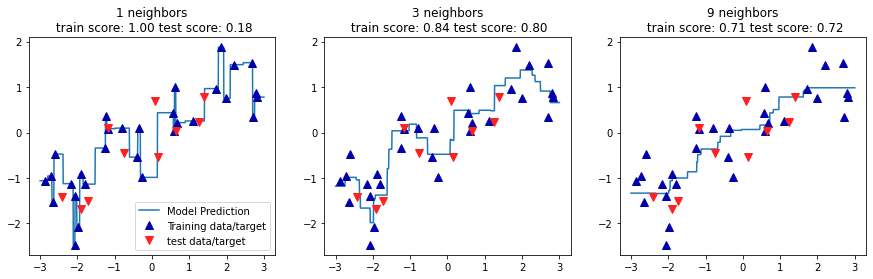

In [132]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbours,ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbours)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mg.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mg.cm2(1),markersize=8)
    ax.set_title(
        "{} neighbors\n train score: {:.2f} test score: {:.2f}".format(n_neighbours,reg.score(X_train,y_train),reg.score(X_test,y_test))
    )
    axes[0].legend(['Model Prediction','Training data/target','test data/target'],loc='best')


w[0]: 0.393906  b: -0.031804


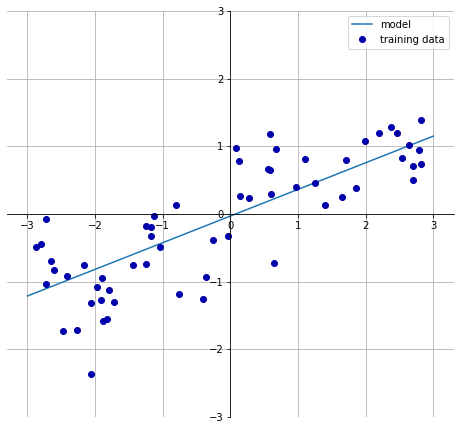

In [133]:
mg.plots.plot_linear_regression_wave()

In [134]:
from sklearn.linear_model import LinearRegression
X,y= mg.datasets.make_wave()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)
lr=LinearRegression().fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[0.44017265]
0.016457707975877804


In [135]:
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import LinearSVC
X,y=mg.datasets.make_forge()


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


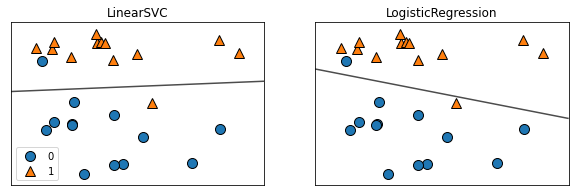

In [136]:
fig, axes=plt.subplots(1,2, figsize=(10,3))
for model, ax in  zip([LinearSVC(),LogisticRegression()], axes):
    clf=model.fit(X,y)
    mg.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=0.7)
    mg.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
axes[0].legend()

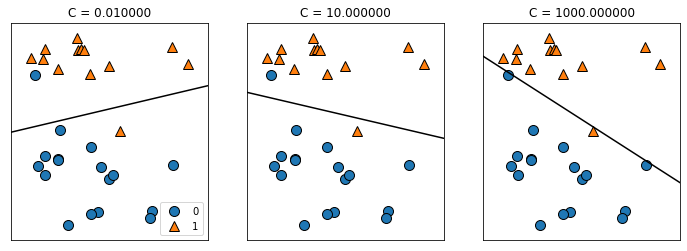

In [137]:
mg.plots.plot_linear_svc_regularization()

In [138]:

from  sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=4)
logreg=LogisticRegression().fit(X_train,y_train)
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.9577464788732394
0.958041958041958


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
logreg100=LogisticRegression(C=1000).fit(X_train,y_train)
print(logreg100.score(X_train,y_train))
print(logreg100.score(X_test,y_test))

0.9483568075117371
0.9370629370629371


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


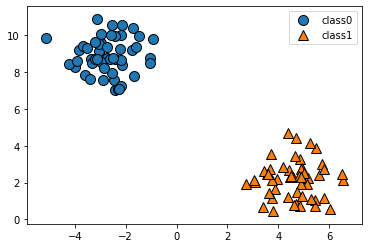

In [140]:
X,y=mg.datasets.make_blobs(random_state=42)
mg.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class0",'class1','class2'])


In [141]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y=make_blobs(random_state=1)
kmeans=KMeans(n_clusters=5)
kmeans.fit(X,y)

KMeans(n_clusters=5)

In [142]:
kmeans.labels_

array([2, 3, 0, 3, 1, 1, 1, 3, 4, 2, 3, 3, 1, 4, 1, 1, 1, 2, 3, 0, 1, 3,
       1, 2, 3, 1, 1, 2, 2, 1, 4, 4, 1, 2, 3, 1, 3, 0, 3, 1, 1, 3, 2, 0,
       3, 1, 4, 2, 4, 2, 3, 1, 1, 1, 4, 1, 0, 3, 4, 2, 3, 1, 1, 3, 0, 1,
       4, 1, 2, 3, 3, 3, 1, 4, 4, 3, 1, 1, 2, 0, 4, 0, 3, 1, 2, 2, 4, 2,
       0, 4, 1, 2, 4, 0, 3, 1, 1, 4, 1, 2])

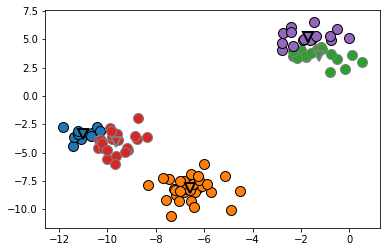

In [143]:
mg.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mg.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],[0,1,2,3,4],markers='v', markeredgewidth=2
)

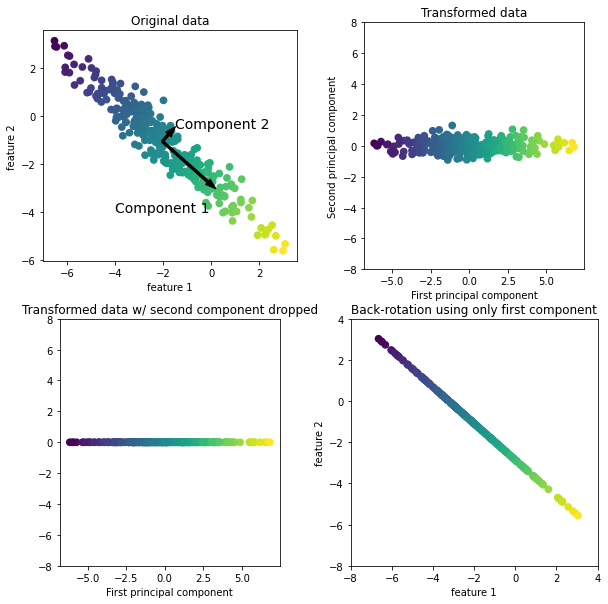

In [144]:
mg.plots.plot_pca_illustration()